In [7]:
# 1. Load the dataset into Python using pandas.

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\Win10\Downloads\student_performance_decision_tree.csv")
df.head()

,Hours_Studied,Previous_Scores,Extracurricular,Sleep_Hours,Internet_Access,Attendance,Performance
0,2,40,No,6,Yes,70,Low
1,5,60,Yes,7,Yes,80,Medium
2,8,85,No,8,Yes,90,High
3,1,35,No,5,No,60,Low
4,6,75,Yes,7,Yes,85,High


In [8]:
#2. Display the first 5 rows and describe each feature.
df.describe()

,Hours_Studied,Previous_Scores,Sleep_Hours,Attendance
count,20.000000,20.000000,20.000000,20.000000
mean,4.600000,60.650000,6.500000,78.950000
std,2.414866,18.345443,1.051315,11.874231
min,1.000000,30.000000,5.000000,55.000000
25%,2.750000,46.500000,6.000000,70.000000
50%,4.500000,59.000000,6.500000,80.000000
75%,6.250000,75.750000,7.000000,88.500000
max,9.000000,92.000000,8.000000,96.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Hours_Studied    20 non-null     int64 
 1   Previous_Scores  20 non-null     int64 
 2   Extracurricular  20 non-null     object
 3   Sleep_Hours      20 non-null     int64 
 4   Internet_Access  20 non-null     object
 5   Attendance       20 non-null     int64 
 6   Performance      20 non-null     object
dtypes: int64(4), object(3)
memory usage: 1.2+ KB


In [10]:
#3. Check for missing values and handle them if any.
df.isnull().sum()

Hours_Studied      0
Previous_Scores    0
Extracurricular    0
Sleep_Hours        0
Internet_Access    0
Attendance         0
Performance        0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:

# 4. Convert categorical variables (Extracurricular, Internet_Access) into numerical form.
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

In [15]:
df.head()

,Hours_Studied,Previous_Scores,Extracurricular,Sleep_Hours,Internet_Access,Attendance,Performance
0,2,40,0,6,1,70,1
1,5,60,1,7,1,80,2
2,8,85,0,8,1,90,0
3,1,35,0,5,0,60,1
4,6,75,1,7,1,85,0


In [16]:
#5. Split the dataset into features (X) and target (y).
X=df.iloc[:,:-1]
y=df.iloc[:,[6]]

In [17]:
#6. Perform train-test split (70% train, 30% test).

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# stratify=y -- It makes sure the class distribution of the target (y) is the same in both training and test sets.

In [18]:
#7. Train a Decision Tree Classifier on the training set

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion="gini",max_depth=2,random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [19]:
#8. Print the learned decision rules (tree structure).

from sklearn.tree import export_text
rules = export_text(dt, feature_names=list(X.columns))
print(rules)

# export_text gives a human-readable set of rules from the decision tree.

|--- Hours_Studied <= 3.50
|   |--- class: 1
|--- Hours_Studied >  3.50
|   |--- Hours_Studied <= 5.50
|   |   |--- class: 2
|   |--- Hours_Studied >  5.50
|   |   |--- class: 0



In [20]:
#9. Predict on the test set.
y_pred = dt.predict(X_test)
print("Predictions on test set:")
y_pred

Predictions on test set:


array([0, 1, 0, 2, 2, 1])

In [21]:
#10. Evaluate performance using accuracy, confusion matrix, and classification report.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

report = classification_report(y_test, y_pred ,zero_division=0)
print("Classification Report:\n", report)

Accuracy: 1.0
Confusion Matrix:
 [[2 0 0]
 [0 2 0]
 [0 0 2]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [22]:
#11. Experiment with max_depth and criterion (gini vs entropy). Compare results.

for depth in [3, 4, 5, None]:
    for crit in ["gini", "entropy"]:
        clf = DecisionTreeClassifier(criterion=crit, max_depth=depth, random_state=42)
        clf.fit(X_train, y_train)
        print(f"Depth={depth}, Criterion={crit}, Accuracy={clf.score(X_test, y_test):.3f}")

Depth=3, Criterion=gini, Accuracy=1.000
Depth=3, Criterion=entropy, Accuracy=1.000
Depth=4, Criterion=gini, Accuracy=1.000
Depth=4, Criterion=entropy, Accuracy=1.000
Depth=5, Criterion=gini, Accuracy=1.000
Depth=5, Criterion=entropy, Accuracy=1.000
Depth=None, Criterion=gini, Accuracy=1.000
Depth=None, Criterion=entropy, Accuracy=1.000


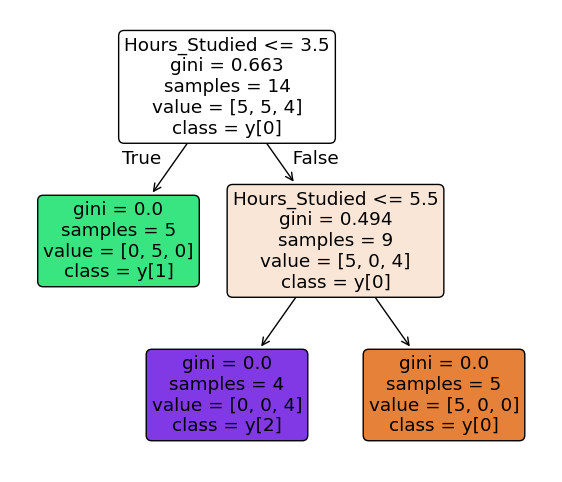

           Feature  Importance
0    Hours_Studied         1.0
1  Previous_Scores         0.0
2  Extracurricular         0.0
3      Sleep_Hours         0.0
4  Internet_Access         0.0
5       Attendance         0.0


In [23]:
#12. Plot the decision tree and interpret which features are most important.
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(7, 6))
plot_tree(dt, feature_names=X.columns, class_names=True, filled=True, rounded=True)
plt.show()

importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importances)

In [24]:
#13. Which features influence student performance the most?

print("Most important features:\n", importances.head(1))

Most important features:
          Feature  Importance
0  Hours_Studied         1.0


In [ ]:
#14. If you were a teacher, how would you use these insights to help students improve?

print ("""If I were a teacher, I would encourage students to spend more time studying with proper schedules,
since hours studied strongly influence performance. 
I would also guide them on balancing study with enough rest and provide offline resources for those lacking internet access.
This way, I could give personalized support to help each student improve.""")